In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import logging

In [22]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


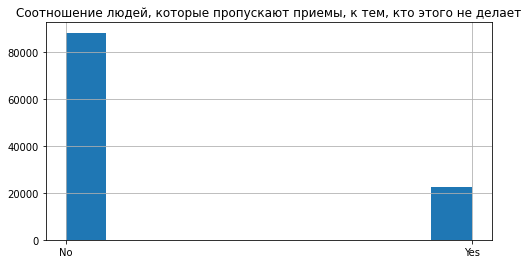

In [23]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [24]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [25]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [26]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [27]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Логирование #

In [29]:
logging.debug('Это сообщение отладки')
logging.info('Это информационное сообщение')
logging.warning('Это сообщение-предупреждение')
logging.error('Это сообщение об ошибке')
logging.critical('Это критическое сообщение')

ERROR:root:Это сообщение об ошибке
CRITICAL:root:Это критическое сообщение


In [30]:
logging.basicConfig(level=logging.DEBUG)
logging.debug('Сообщение будет залогировано!')

In [31]:
logging.FileHandler('log_file.log')

<FileHandler c:\Users\79265\Documents\IDE_3\sf_df\Skillfactory\EDA_6. Experiment Design\log_file.log (NOTSET)>

In [38]:
logging.basicConfig(format="%(levelname)s: %(asctime)s: %(message)s", level=logging.DEBUG)
logging.info('Проверка')

In [32]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [33]:
!mkdir logs

�������� ��� 䠩� logs 㦥 �������.


In [34]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info(f"Data shape {df.shape}")

logger.info(f"Percentage of women: {df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]}")

logger.info(f"Percentage of men: {df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]}")

In [35]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR:root:Data shape is incorrect!


# Comet.ml#

In [36]:
from comet_ml import Experiment

In [37]:
# Создать эксперимент с помощью своего API ключа
experiment = Experiment(
    api_key="KiOnRStRhvFXU2wbQP9lNW8WP",
    project_name="medical-appointment",
    workspace="mari-onetka",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/mari-onetka/medical-appointment/df5f8a0f81b448b4ad622e4b444e5804
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (79.28 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/mari-onetka/medical-appointment/9576f23624684fb8a2877ce3eeaaed9